In [3]:
import espresso_machine as esma

In [4]:
#Initialize model
model = esma.project(project_id="Al") #Define project
model.set_cores(8) #Define number of prcessing cores
model.get_structure(format='poscar') #Load structure
model.get_primitive() #Get primitive cell
model.ecutwfc(80) #Set wavefunction cutoff
model.k_points(6) #Set number of k points
model.set_pseudo('US')

In [5]:
#Crystal optimization
model.calculate('vc-relax')

vc-relax is finished


In [6]:
#Scf calculation
model.get_structure('vc-relax') #Get relaxed strucutre
model.calculate('scf')

scf is finished


In [7]:
#Bands calculation
path = ['L','GAMMA','X','U','GAMMA'] #define corners
num_points = 40 #number of points
model.band_points(path,num_points) #define path
model.calculate('bands')

bands is finished
bands-pp is finished


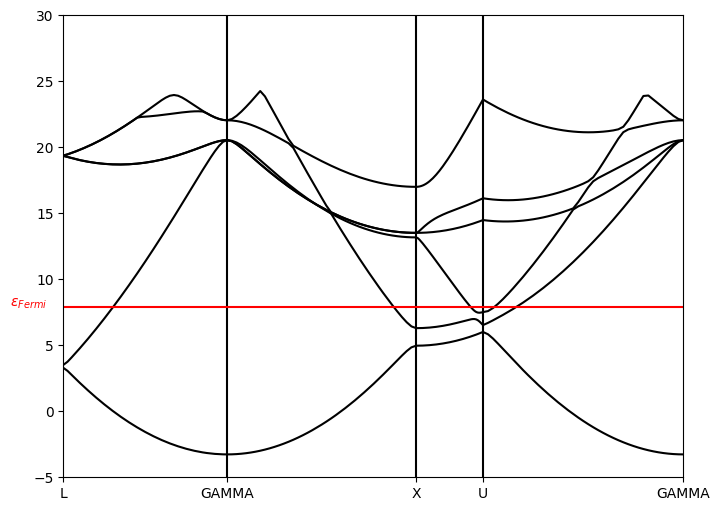

In [8]:
#Band plotting
model.plot('electron',ylim=[-5,30]) #plot electron bands

In [9]:
#Nscf calculation
model.occupations('tetrahedra')
model.nosym('false')
model.k_points(20)
model.calculate('nscf')

nscf is finished


In [10]:
#Density of states calculation
model.dos(emin=-5,emax=30)
model.calculate('dos')

dos is finished


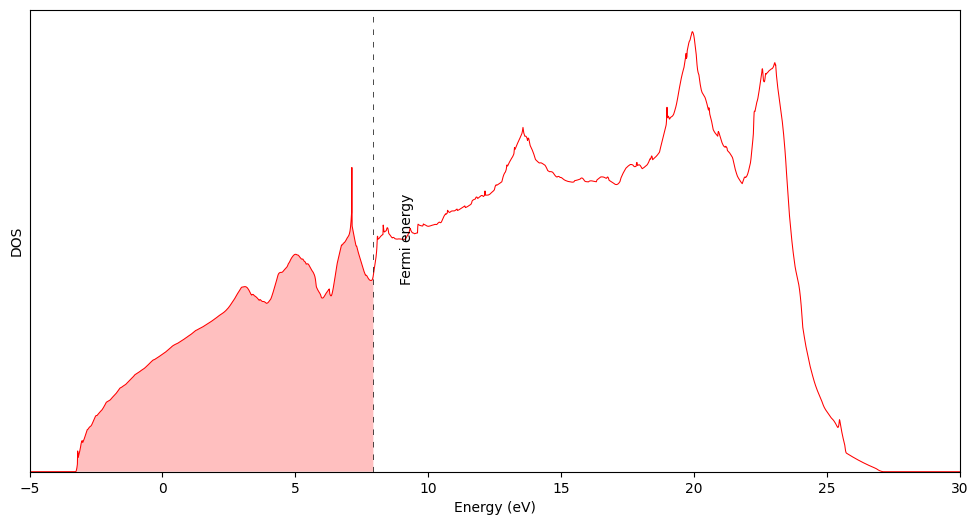

In [11]:
#DOS Plotting
model.plot('dos',xlim=[-5,30]) #plot dos

In [12]:
#Calculate PDOS
model.pdos(emin=-5,emax=30)
model.calculate('pdos')

pdos is finished


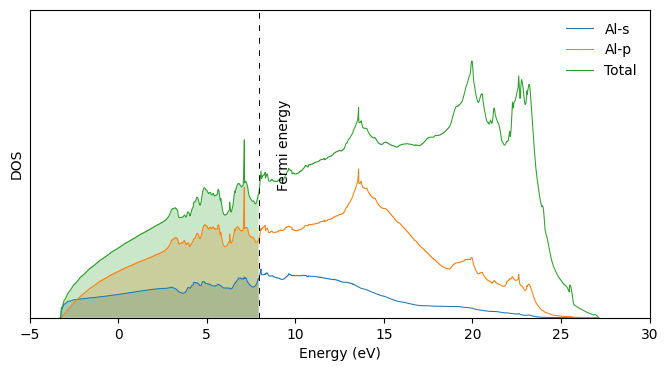

In [13]:
#Plot PDOS
model.plot('pdos',xlim=[-5,30])